## Descriptive and Statistical analysis of MBC2 data (cleaned)
#### This notebook contains code for generating tables/figures of descriptive analysis results from cleaned MBC2 data, including outliers, Statistical results and distributions.
#### The sections are based on each preliminary outcomes:
<ol>
    <li><b>Fruit/Vegetable Credit</b></li>
    <li><b>Saturated Fat</b></li>
    <li><b>MVPA Minutes</b></li>
    <li><b>Sedentary Minutes</b></li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import pandasql as ps
import time 
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# load dataset (cleaned)

# outcomes
df_food = pd.read_csv('Result/Food/food_all_userlevel.csv') 
df_pa = pd.read_csv('Result/MVPA/pa_combined.csv') 
df_sed = pd.read_csv('Result/sed_clean.csv.') 

# demographic infomation
df_user = pd.read_csv('Raw Data/users.csv') 
df_redcap = pd.read_csv('Raw Data/mbc2_redcap.csv') 

In [37]:
# functions

def Stats(df, column, IQR_range):
    l = list(df[column])
    for i in range(0, len(l)): 
        l[i] = float(l[i])
    Max = np.max(l)
    Min = np.min(l)
    Mean = np.mean(l)
    Median = np.median(l)
    STD = np.std(l)
    
    #outlier percentage
    q1 = np.percentile(l, 25)  
    q3 = np.percentile(l, 75)
    IQR = q3-q1
    low = q1 - IQR_range*IQR
    high = q3 + IQR_range*IQR

    outliersPercent = len([i for i in l if i < low or i > high]) / len(l) * 100
    return([Min, Max, Mean, Median, STD, IQR_range, low, high, outliersPercent])

def outliers(df, column, IQR_level):
    l = list(df[column])
    for i in range(0, len(l)): 
        l[i] = float(l[i])
    
    #outlier percentage
    q1 = np.percentile(l, 25)  
    q3 = np.percentile(l, 75)
    IQR = q3-q1
    low = q1 - IQR_level*IQR
    high = q3 + IQR_level*IQR
    
    return([low, high])

def check_float(potential_float):
    try:
        float(potential_float)
        return True
    except ValueError:
        return False

## Food-Related (fv credit + fat)

In [14]:
df_food.head(5)

,study_id,user_id,upload_time,calories,protein,total_fat,total_carbohydrate,sugars,fiber,calcium,sodium,saturated_fatty_acids,cholesterol,fv_credit
0,1383,39,10/15/2012,1946.710000,61.975100,69.556500,280.354200,56.890300,21.663000,704.350000,4172.770000,20.223960,37.500000,1.420
1,1383,39,10/16/2012,2932.600000,98.993400,110.295600,400.075800,94.881400,29.700000,955.900000,6551.640000,42.810680,207.420000,2.000
2,1383,39,10/17/2012,998.800581,37.058479,23.381167,165.854971,83.019175,14.579074,837.195209,1845.793394,5.277169,70.090744,3.150
3,1383,39,10/18/2012,2545.292500,103.638925,106.018425,295.998700,63.308375,19.920500,287.212500,4967.202500,10.751560,20.000000,1.275
4,1383,39,10/19/2012,1352.627500,41.345675,34.445725,222.308300,63.417100,12.460000,805.955000,3060.955000,9.210712,45.000000,2.625


#### Statistical Result

In [15]:
#remove non-numeric credit
df_food = df_food[df_food['fv_credit'].apply(lambda x: check_float(x))]
fv_stats = ['Fruit/Vegetables Credit'] + Stats(df_food, 'fv_credit')
fat_stats = ['Total Fat'] + Stats(df_food, 'total_fat')
carbohydrate_stats = ['Total_carbohydrate'] + Stats(df_food, 'total_carbohydrate')
sugars_stats = ['Sugars'] + Stats(df_food, 'sugars')
fiber_stats = ['Fiber'] + Stats(df_food, 'fiber')
calcium_stats = ['Calcium'] + Stats(df_food, 'calcium')
sodium_stats = ['Sodium'] + Stats(df_food, 'sodium')
fatty_acids_stats = ['Saturated_fatty_acids'] + Stats(df_food, 'saturated_fatty_acids')
cholesterol_stats = ['Cholesterol'] + Stats(df_food, 'cholesterol')
allList = [fv_stats, fat_stats, carbohydrate_stats,sugars_stats, fiber_stats, calcium_stats, sodium_stats, fatty_acids_stats, cholesterol_stats]
pd.DataFrame(allList, columns=['Outcome', 'Min', 'Max', 'Mean', 'Median', 'Standard Deviation', 'Outlier Percentage'])

,Outcome,Min,Max,Mean,Median,Standard Deviation,Outlier Percentage
0,Fruit/Vegetables Credit,0.0,329.270000,8.469789,8.250000,6.738184,25.286927
1,Total Fat,0.0,2234.227977,41.458106,29.938612,49.028861,24.119838
2,Total_carbohydrate,0.0,9725.472366,196.778316,167.000000,169.416185,23.547826
3,Sugars,0.0,5320.511243,93.191409,74.331777,90.538586,22.032544
4,Fiber,0.0,734.144134,19.434575,16.671542,15.988023,25.074074
5,Calcium,0.0,23073.704510,386.879851,265.967500,479.022214,20.127027
6,Sodium,0.0,67957.721040,1740.709336,1322.226250,1903.445457,25.503425
7,Saturated_fatty_acids,0.0,834.163328,12.934805,8.494335,17.347493,21.664000
8,Cholesterol,0.0,8810.508284,128.778834,70.000000,202.797177,14.050943


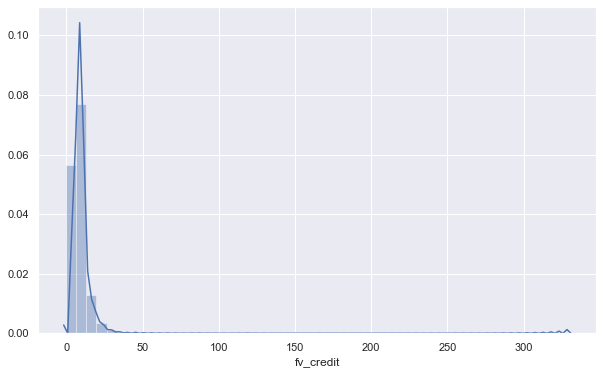

In [19]:
# distribution (fruit/vegetable credit)
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df_food["fv_credit"])

#### Abnormal Values

In [21]:
# top largest outcome (calories)
df_food.nlargest(5,'calories')

,study_id,user_id,upload_time,calories,protein,total_fat,total_carbohydrate,sugars,fiber,calcium,sodium,saturated_fatty_acids,cholesterol,fv_credit
12381,3490,203,9/9/2013,67406.71879,2307.637623,2234.227977,9725.472366,5320.511243,734.144134,19689.840870,67957.72104,749.395173,8810.508284,308.210
9968,3265,204,9/21/2013,38293.92338,1881.176395,1598.997842,4015.334064,1792.025611,170.254938,23073.704510,57913.97529,834.163328,6344.917522,13.080
25267,5896,438,3/10/2014,30813.23463,1796.312165,804.654658,4325.540266,3081.915352,490.665033,10282.356950,23135.71763,274.776035,3688.121000,329.270
21626,5206,386,10/18/2013,28052.36432,783.856646,855.985463,4596.206500,2065.425578,356.772646,6623.408000,30441.42884,235.576739,1319.600000,164.710
1370,1845,26,5/13/2013,25251.67794,691.299823,359.680522,5021.202253,1998.190553,191.047000,3820.112784,19713.68196,115.673283,1675.952990,113.075


In [ ]:
# iterate through nutrients list
outcomeList = ['fv_credit',
 'calories',
 'protein',
 'total_fat',
 'total_carbohydrate',
 'sugars',
 'fiber',
 'calcium',
 'sodium',
 'saturated_fatty_acids',
 'cholesterol']

# get top 2% largest of all nutrients
for item in outcomeList:
    df_temp = df_food.nlargest(int(df_food.shape[0]*0.02), item)
    name = 'Abnormal/' + item + '.csv'
    df_temp.to_csv(name, index=False)

In [ ]:
# save abnormal serving IDs to text files
def outLiersServingId(df, column, idCol):
    l = list(df[column])
    l2 = np.asarray(list(df[idCol]))
    
    for i in range(0, len(l)): 
        l[i] = float(l[i])
    
    #outlier percentage
    q1 = np.percentile(l, 25)  
    q3 = np.percentile(l, 75)
    IQR = q3-q1
    low = q1 - 1.5*IQR
    high = q3+1.5*IQR
    
    index = [i for i, elem in enumerate(l) if elem > high or elem < low]
    
    return(df.iloc[index,:], list(set(l2[index])))

df_1, l_1 = outLiersServingId(df_food, 'calories', 'serving_id')
df_2, l_2 = outLiersServingId(df_food, 'total_fat', 'serving_id')
df_3, l_3 = outLiersServingId(df_food, 'fv_credit', 'serving_id')

with open('Outliers/calories_servingID.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % i for i in l_1)

with open('Outliers/total_fat_servingID.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % i for i in l_2)

with open('Outliers/fv_credit_servingID.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % i for i in l_3)

#### Outliers by Gender (1.5&3.0 IQR)

In [28]:
# add gender 
df_gender = df_redcap[['Participant ID', 'Sex']]
df_gender.columns = ['study_id', 'gender']
df_gender['gender'] = df_gender['gender'].astype('string').str[0]
df_gender.head(5)

#merge gender with info
df_food_gender = df_food.merge(df_gender, on = 'study_id')

#remove user's ID
df_food_gender = df_food_gender.drop(['user_id'], axis=1)
df_food_gender.head(5)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,study_id,upload_time,calories,protein,total_fat,total_carbohydrate,sugars,fiber,calcium,sodium,saturated_fatty_acids,cholesterol,fv_credit,gender
0,1383,10/15/2012,1946.710000,61.975100,69.556500,280.354200,56.890300,21.663000,704.350000,4172.770000,20.223960,37.500000,1.420,2
1,1383,10/16/2012,2932.600000,98.993400,110.295600,400.075800,94.881400,29.700000,955.900000,6551.640000,42.810680,207.420000,2.000,2
2,1383,10/17/2012,998.800581,37.058479,23.381167,165.854971,83.019175,14.579074,837.195209,1845.793394,5.277169,70.090744,3.150,2
3,1383,10/18/2012,2545.292500,103.638925,106.018425,295.998700,63.308375,19.920500,287.212500,4967.202500,10.751560,20.000000,1.275,2
4,1383,10/19/2012,1352.627500,41.345675,34.445725,222.308300,63.417100,12.460000,805.955000,3060.955000,9.210712,45.000000,2.625,2


In [33]:
# split by gender 
df_male = df_food_gender[df_food_gender['gender'] == '1']
df_female = df_food_gender[df_food_gender['gender'] == '2']

#get outliers info
cal_male = outliers(df_male, 'calories', 1.5)
cal_female = outliers(df_female, 'calories', 1.5)
cal_male2 = outliers(df_male, 'calories', 3.0)
cal_female2 = outliers(df_female, 'calories', 3.0)

fv_male = outliers(df_male, 'fv_credit', 1.5)
fv_female = outliers(df_female, 'fv_credit', 1.5)
fv_male2 = outliers(df_male, 'fv_credit', 3.0)
fv_female2 = outliers(df_female, 'fv_credit', 3.0)

fat_male = outliers(df_male, 'total_fat', 1.5)
fat_female = outliers(df_female, 'total_fat', 1.5)
fat_male2 = outliers(df_male, 'total_fat', 3.0)
fat_female2 = outliers(df_female, 'total_fat', 3.0)

cal_male_1 = ['Calories', 'Male', 1.5] + cal_male
cal_male_2 = ['Calories', 'Male', 3.0] + cal_male2
fv_male_1 = ['FV_credit', 'Male', 1.5] + fv_male
fv_male_2 = ['FV_credit', 'Male', 3.0] + fv_male2
fat_male_1 = ['Fat', 'Male', 1.5] + fat_male
fat_male_2 = ['Fat','Male', 3.0] + fat_male2

cal_female_1 = ['Calories', 'Female', 1.5] + cal_female
cal_female_2 = ['Calories', 'Female', 3.0] + cal_female2
fv_female_1 = ['FV_credit', 'Female', 1.5] + fv_female
fv_female_2 = ['FV_credit', 'Female', 3.0] + fv_female2
fat_female_1 = ['Fat', 'Female', 1.5] + fat_female
fat_female_2 = ['Fat','Female', 3.0] + fat_female2

allList = [cal_male_1, cal_male_2, fv_male_1, fv_male_2, fat_male_1, fat_male_2, cal_female_1, cal_female_2, fv_female_1, fv_female_2, fat_female_1, fat_female_2]
pd.DataFrame(allList, columns=['Outcome', 'Gender', 'IQR', 'Low_cutoff', 'High_cutoff'])

,Outcome,Gender,IQR,Low_cutoff,High_cutoff
0,Calories,Male,1.5,-1245.766875,3889.678125
1,Calories,Male,3.0,-3171.558750,5815.470000
2,FV_credit,Male,1.5,-5.181875,21.623125
3,FV_credit,Male,3.0,-15.233750,31.675000
4,Fat,Male,1.5,-75.180140,143.374463
5,Fat,Male,3.0,-157.138116,225.332439
6,Calories,Female,1.5,-852.671383,3153.070830
7,Calories,Female,3.0,-2354.824712,4655.224159
8,FV_credit,Female,1.5,-3.790000,18.850000
9,FV_credit,Female,3.0,-12.280000,27.340000


### MVPA Minutes (shimmer + self-reported)

#### Sliding window (10 consecutive days)

In [ ]:
# require shimmer data (not run)
df_pa_device_active = df_pa_device[df_pa_device['pa_count'] >= 1900]
df_pa_device_active = df_pa_device_active[['user_id','tstamp','pa_count']]
df_pa_device_active = df_pa_device_active.sort_values(["user_id", "tstamp"], ascending = (True, True))

In [ ]:
def ranges(nums):
    nums = sorted(set(nums))
    gaps = [[s, e] for s, e in zip(nums, nums[1:]) if s+1 < e]
    edges = iter(nums[:1] + sum(gaps, []) + nums[-1:])
    return list(zip(edges, edges))

ids = list(set(list(df_pa_device_active['user_id'])))

finalTables = []
for singleId in ids:
    test = df_pa_device_active[df_pa_device_active['user_id'] == singleId]
    test['day'] = test['tstamp'].astype('string').str[:10]
    test['time'] = test['tstamp'].astype('string').str[11:]
    days = list(set(list(test['day'])))

    MVPA = []

    for j in range(len(days)):
        times = list(test[test['day'] == days[j]]['time'])
        minutes = []
        if (len(times) >= 10):
            for i in range(len(times) - 1):
                curMinute = datetime.strptime(times[i], '%H:%M:%S')
                minutes.append(curMinute.minute)

        result = ranges(minutes)
        total = 0
        for i in range(len(result)):
            diff = result[i][1]-result[i][0]
            if diff >= 10:
                total = total + diff

        MVPA.append(total)

    ID = [singleId]*len(MVPA)

    final = pd.DataFrame({'user_id': ID,
         'upload_time': days,
         'minutes': MVPA
        })
    finalTables.append(final)

In [ ]:
df = pd.concat(finalTables)

#remove 0 minutes
df = df[df['minutes']>0]

#sort and visualize
df = df.sort_values(["user_id", "upload_time"], ascending = (True, True))
df = df.reset_index(drop=True)
df.head(5)

In [ ]:
def combine(df_shimmer, df_pa):
    #clean pa_upload 
    pa_list_included = ['user_id','tstamp_phone','min']
    df_pa = df_pa[pa_list_included]
    
    #get day-level date
    df_pa['tstamp_phone'] = df_pa['tstamp_phone'].astype('string').str[:10]

    #aggregate day-level minutes (sum)
    df_pa= ps.sqldf("SELECT user_id, tstamp_phone as upload_time, sum(min) as pa_minute_app FROM df_pa group by user_id, tstamp_phone")
    
    #merge two
    combine = pd.merge(df_pa, df_shimmer, how='outer', on=['user_id', 'upload_time'])
    
    #fill missing values with 0
    combine['pa_minute_app'] = combine['pa_minute_app'].fillna(0)
    combine['minutes'] = combine['minutes'].fillna(0)

    #get combined outcome (sum)
    combine['MVPA_min'] = combine['pa_minute_app'] + combine['minutes']
    combine.columns = ['user_id', 'upload_time','pa_minute_app','pa_minute_shimmer', 'pa_minute_total']
    return(combine)

df_window = combine(df, df_pa)
df_window.to_csv('Result/pa_window.csv', index=False)

### Sedentary Minutes

#### Statistical Results

In [38]:
sed_stats1 = ['Sedentary Minutes'] + Stats(df_sed, 'sed_total', 1.5)
sed_stats2 = ['Sedentary Minutes'] + Stats(df_sed, 'sed_total', 3.0) 
allList = [sed_stats1, sed_stats2]
pd.DataFrame(allList, columns=['Outcome', 'Min', 'Max', 'Mean', 'Median', 'Standard Deviation', 'IQR', 'Low-Cutoff', 'High-Cutoff', 'Outlier Percentage'])

,Outcome,Min,Max,Mean,Median,Standard Deviation,IQR,Low-Cutoff,High-Cutoff,Outlier Percentage
0,Sedentary Minutes,0.0,1320.0,73.793049,67.0,66.199768,1.5,-60.0,180.0,4.198026
1,Sedentary Minutes,0.0,1320.0,73.793049,67.0,66.199768,3.0,-150.0,270.0,1.342612


Text(278.0, 0.004, 'IQR=3.0')

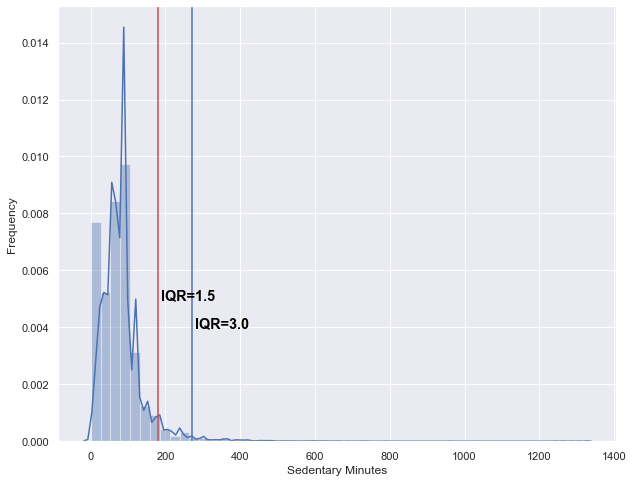

In [40]:
# Distribution
high_sed_1 = Stats(df_sed, 'sed_total', 1.5)[-2]
high_sed_2 = Stats(df_sed, 'sed_total', 3.0)[-2]

sns.set(rc={"figure.figsize": (10, 8)})
ax = sns.distplot(list(df_sed['sed_total']))
ax.set(xlabel='Sedentary Minutes', ylabel='Frequency')

plt.axvline(high_sed_1, 0, 1,color='r')
ax.text(high_sed_1 + 8, 0.005, "IQR=1.5", horizontalalignment='left', size='large', color='black', weight='semibold')

plt.axvline(high_sed_2, 0, 1,color='b')
ax.text(high_sed_2 + 8, 0.004, "IQR=3.0", horizontalalignment='left', size='large', color='black', weight='semibold')

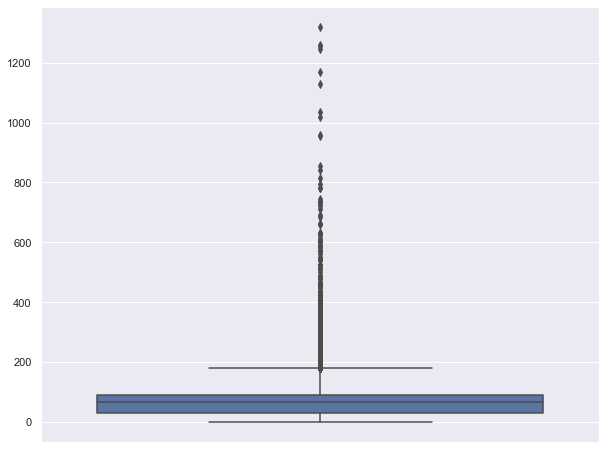

In [41]:
# Box plot
sns.boxplot(list(df_sed['sed_total']) , orient = 'v')